meltome-mixed_split-cnn-esm-ensemble.pdf


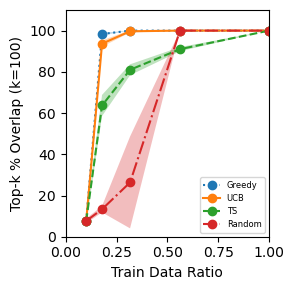

meltome-mixed_split-cnn-esm-evidential.pdf


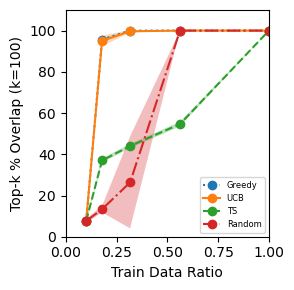

meltome-mixed_split-gp-esm-gp.pdf


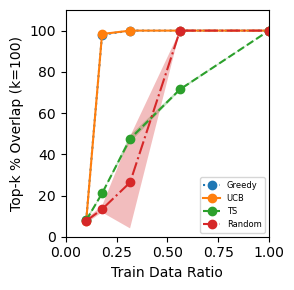

gb1-sampled-cnn-esm-ensemble.pdf


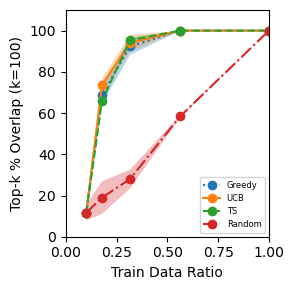

gb1-sampled-cnn-esm-evidential.pdf


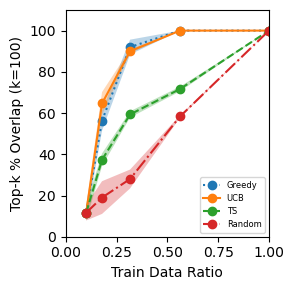

gb1-sampled-gp-esm-gp.pdf


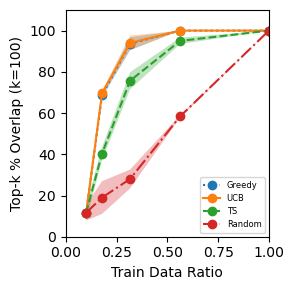

aav-sampled-cnn-esm-ensemble.pdf


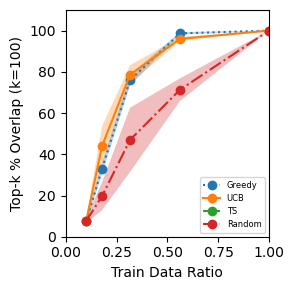

aav-sampled-cnn-esm-evidential.pdf


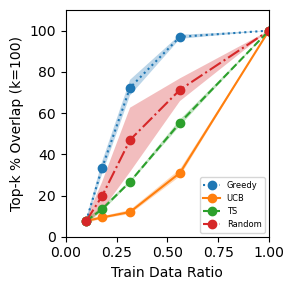

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}

al_results_dir = "../src/active_learning/al_results"

results_dirs = []
for rootdir, dirs, files in os.walk(al_results_dir):
    for subdir in dirs:
        results_dirs.append(os.path.join(rootdir, subdir))

results_dirs = [s.split('/') for s in results_dirs]
results_dirs = [l[4:] for l in results_dirs if ((len(l)==9 and "dropout" not in l) or (len(l)==10 and "dropout" in l))]

for dir_names in results_dirs:
    
    if dir_names[4] == "dropout":
        results_dir = al_results_dir+f"/{dir_names[0]}/{dir_names[1]}/{dir_names[2]}/{dir_names[3]}/{dir_names[4]}/{dir_names[5]}/"
    else:
        results_dir = al_results_dir+f"/{dir_names[0]}/{dir_names[1]}/{dir_names[2]}/{dir_names[3]}/{dir_names[4]}/"
    
    fig_name = f"{dir_names[0]}-{dir_names[1]}-{dir_names[2]}-{dir_names[3]}-{dir_names[4]}.pdf"
    main_fig_names = [
        "aav-sampled-cnn-esm-ensemble.pdf",
        "meltome-mixed_split-gp-esm-gp.pdf",
        "gb1-sampled-gp-esm-gp.pdf",
        "meltome-mixed_split-cnn-esm-evidential.pdf",
        "meltome-mixed_split-cnn-esm-ensemble.pdf",
        "gb1-sampled-cnn-esm-ensemble.pdf",
        "aav-sampled-cnn-esm-evidential.pdf",
        "gb1-sampled-cnn-esm-evidential.pdf",
    ]
    if fig_name in main_fig_names:
        print(fig_name)
        csv_list = [s for s in os.listdir(results_dir) if s.endswith(".csv")]

        try:
            df = pd.read_csv(f"{results_dir}{csv_list[0]}")
        except:
            continue

        for csv in csv_list[1:]:
            df = pd.concat([df, pd.read_csv(f"{results_dir}{csv}")])

        df.sort_values(["Strategy", "Trial"], inplace=True)

        f = plt.figure(figsize=(3,3))

        # for strategy in ["exploit_ucb", "exploit_ts", "score_greedy", "random", "exploit_lcb", "exploit", "score_sample"]:
        for strategy in ["exploit", "exploit_ucb", "exploit_ts", "random"]:
            if strategy=="exploit_ucb":
                plotstyle = 'o-'
                strategy_label = "UCB"  # *
            elif strategy=="exploit_ts":
                plotstyle = 'o--'
                strategy_label = "TS"  # *
            elif strategy=="score_greedy":
                plotstyle = 'o:'
                strategy_label = "Score Greedy"
            elif strategy=="random":
                plotstyle = 'o-.'
                strategy_label = "Random"
            elif strategy=="exploit_lcb":
                plotstyle = 'o-'
                strategy_label = "LCB"  # *
            elif strategy=="exploit":
                plotstyle = 'o:'
                strategy_label = "Greedy"  # *
            elif strategy=="score_sample":
                plotstyle = 'o-'
                strategy_label = "Score Sample"
            
            df_mean = df.loc[(df.Strategy==strategy)].groupby("Train Data Ratio").mean()
            df_std = df.loc[(df.Strategy==strategy)].groupby("Train Data Ratio").std()

            plt.subplot(1, 1, 1)
            plt.plot(df_mean.index, df_mean.TopKPercentOverlap, plotstyle, label=strategy_label)
            plt.fill_between(df_mean.index, df_mean.TopKPercentOverlap-df_std.TopKPercentOverlap, df_mean.TopKPercentOverlap+df_std.TopKPercentOverlap, alpha=0.3)
        
        plt.xlabel("Train Data Ratio")
        plt.ylabel("Top-k % Overlap (k=100)")
        
        plt.xlim(0,1)
        plt.ylim(0,110)
        plt.legend(loc="lower right", fontsize=6)
        
        f.tight_layout()

        plt.savefig(f"bo_figures/main9/{fig_name}", 
                    facecolor='white')
        plt.show()

aav-sampled-cnn-esm-ensemble.pdf
[Errno 2] No such file or directory: '../src/active_learning/al_results/aav/sampled/cnn/esm/ensemble/exploit_ts/0/2/train/preds.csv'
[Errno 2] No such file or directory: '../src/active_learning/al_results/aav/sampled/cnn/esm/ensemble/exploit_ts/0/3/train/preds.csv'
[Errno 2] No such file or directory: '../src/active_learning/al_results/aav/sampled/cnn/esm/ensemble/exploit_ts/0/4/train/preds.csv'
[Errno 2] No such file or directory: '../src/active_learning/al_results/aav/sampled/cnn/esm/ensemble/exploit_ts/1/0/train/preds.csv'
[Errno 2] No such file or directory: '../src/active_learning/al_results/aav/sampled/cnn/esm/ensemble/exploit_ts/1/1/train/preds.csv'
[Errno 2] No such file or directory: '../src/active_learning/al_results/aav/sampled/cnn/esm/ensemble/exploit_ts/1/2/train/preds.csv'
[Errno 2] No such file or directory: '../src/active_learning/al_results/aav/sampled/cnn/esm/ensemble/exploit_ts/1/3/train/preds.csv'
[Errno 2] No such file or directory:

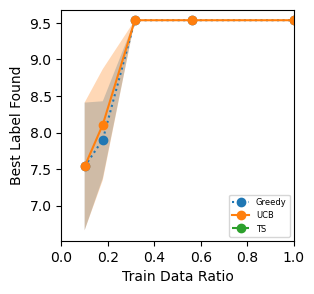

meltome-mixed_split-gp-esm-gp.pdf
[Errno 2] No such file or directory: '../src/active_learning/al_results/meltome/mixed_split/gp/esm/gp/exploit/2/4/train/preds.csv'
[Errno 2] No such file or directory: '../src/active_learning/al_results/meltome/mixed_split/gp/esm/gp/exploit_ts/2/4/train/preds.csv'
bo_figures/main9/meltome-mixed_split-gp-esm-gp_train_maxes.pdf


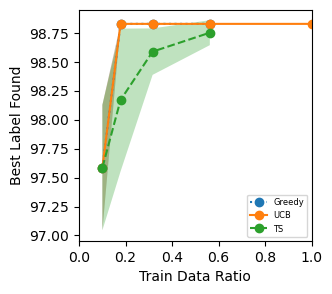

gb1-sampled-gp-esm-gp.pdf
bo_figures/main9/gb1-sampled-gp-esm-gp_train_maxes.pdf


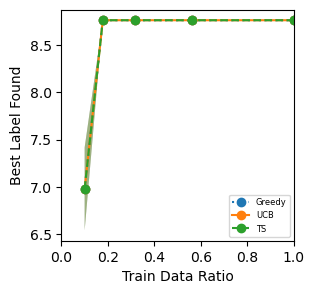

meltome-mixed_split-cnn-esm-evidential.pdf
bo_figures/main9/meltome-mixed_split-cnn-esm-evidential_train_maxes.pdf


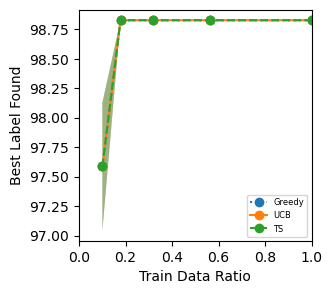

meltome-mixed_split-cnn-esm-ensemble.pdf
bo_figures/main9/meltome-mixed_split-cnn-esm-ensemble_train_maxes.pdf


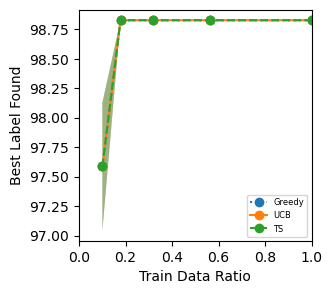

gb1-sampled-cnn-esm-ensemble.pdf
bo_figures/main9/gb1-sampled-cnn-esm-ensemble_train_maxes.pdf


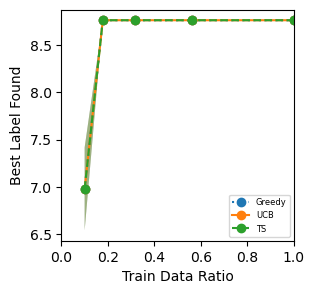

aav-sampled-cnn-esm-evidential.pdf
bo_figures/main9/aav-sampled-cnn-esm-evidential_train_maxes.pdf


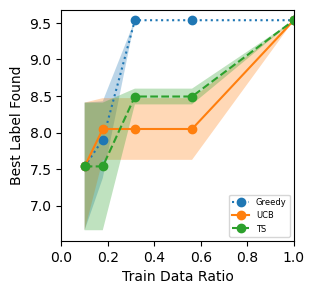

gb1-sampled-cnn-esm-evidential.pdf
bo_figures/main9/gb1-sampled-cnn-esm-evidential_train_maxes.pdf


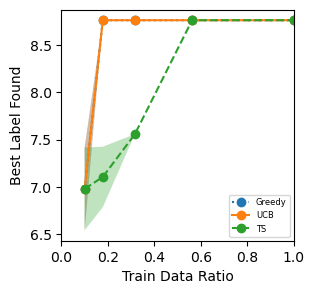

In [3]:
for plot_name in main_fig_names:
    print(plot_name)
    plt.figure(figsize=(3, 3))
    plot_name_split = plot_name.split('-')
    
    
    for strategy in ["exploit", "exploit_ucb", "exploit_ts"]:  #, "random"]:
        if strategy=="exploit_ucb":
            plotstyle = 'o-'
            strategy_label = "UCB"
        elif strategy=="exploit_ts":
            plotstyle = 'o--'
            strategy_label = "TS"
        elif strategy=="score_greedy":
            plotstyle = 'o:'
            strategy_label = "Score Greedy"
        elif strategy=="random":
            plotstyle = 'o-.'
            strategy_label = "Random"
        elif strategy=="exploit_lcb":
            plotstyle = 'o-'
            strategy_label = "LCB"
        elif strategy=="exploit":
            plotstyle = 'o:'
            strategy_label = "Greedy"
        elif strategy=="score_sample":
            plotstyle = 'o-'
            strategy_label = "Score Sample"
        
        results_dir = f"../src/active_learning/al_results/{plot_name_split[0]}/{plot_name_split[1]}/{plot_name_split[2]}/{plot_name_split[3]}/{plot_name_split[4][:-4]}/{strategy}"

        train_maxes = []

        for cv_run in [0, 1, 2]:
                train_maxes.append([])
                for al_step in [0, 1, 2, 3, 4]:
                    try:
                        train_preds = pd.read_csv(f"{results_dir}/{cv_run}/{al_step}/train/preds.csv")
                        # find the best label in the training set
                        train_max = max(train_preds['labels'])
                        train_maxes[cv_run].append(train_max)
                    except FileNotFoundError as e:
                        print(e)
                        train_maxes[cv_run].append(np.nan)
                    

        train_maxes = np.array(train_maxes)

        train_maxes_mean = np.mean(train_maxes, axis=0) 
        train_maxes_std = np.std(train_maxes, axis=0)

        plt.plot(df_mean.index, train_maxes_mean, plotstyle, label=strategy_label)
        plt.fill_between(df_mean.index, train_maxes_mean-train_maxes_std, train_maxes_mean+train_maxes_std, alpha=0.3)

    plt.xlabel("Train Data Ratio")
    plt.ylabel("Best Label Found")
    
    plt.xlim(0,1)
    # plt.ylim(0,110)
    plt.legend(loc="lower right", fontsize=6)
    
    f.tight_layout()

    # prevent axes labels from being cut off using bbox_inches="tight"


    new_fig_name = f"bo_figures/main9/{plot_name[:-4]}_train_maxes.pdf"
    print(new_fig_name)
    plt.savefig(new_fig_name, bbox_inches='tight', pad_inches=0, facecolor='white')
    plt.show()

